In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading data
df = pd.read_excel('Demo Data.xlsx', sheet_name='Instrument - Spectrometer L')
corneo_df = pd.read_excel('Demo Data.xlsx', sheet_name='Instrument - Corneometer')

In [3]:
# Using first two rows to construct proper headers
header_row1 = df.iloc[0].ffill()
header_row2 = df.iloc[1]
column_names = [f"{str(h1).strip()} ({str(h2).strip()})" for h1, h2 in zip(header_row1, header_row2)]

In [4]:
column_names

['nan (nan)',
 'Visit 1 - Baseline (L)',
 'Visit 1 - Baseline (a)',
 'Visit 1 - Baseline (b)',
 'Visit 1 - Timm (L)',
 'Visit 1 - Timm (a)',
 'Visit 1 - Timm (b)',
 'Visit 2 (L)',
 'Visit 2 (a)',
 'Visit 2 (b)',
 'Visit 3 (L)',
 'Visit 3 (a)',
 'Visit 3 (b)',
 'Visit 3 (nan)',
 'Visit 3 (nan)',
 'Visit 1 - Baseline (L)',
 'Visit 1 - Baseline (a)',
 'Visit 1 - Baseline (b)',
 'Visit 1 - Timm (L)',
 'Visit 1 - Timm (a)',
 'Visit 1 - Timm (b)',
 'Visit 2 (L)',
 'Visit 2 (a)',
 'Visit 2 (b)',
 'Visit 3 (L)',
 'Visit 3 (a)',
 'Visit 3 (b)']

In [5]:
# Applying new headers
df.columns = column_names
df = df.iloc[2:].reset_index(drop=True)


In [6]:
df.head()

,nan (nan),Visit 1 - Baseline (L),Visit 1 - Baseline (a),Visit 1 - Baseline (b),Visit 1 - Timm (L),Visit 1 - Timm (a),Visit 1 - Timm (b),Visit 2 (L),Visit 2 (a),Visit 2 (b),...,Visit 1 - Baseline (b),Visit 1 - Timm (L),Visit 1 - Timm (a),Visit 1 - Timm (b),Visit 2 (L),Visit 2 (a),Visit 2 (b),Visit 3 (L),Visit 3 (a),Visit 3 (b)
0,NaN,49.74,10.59,19.58,50.83,11.56,19.97,50.62,11.54,19.74,...,18.33,51.45,11.64,19.25,51.78,8.64,16.3,51.55,12.76,19.1
1,NaN,46.11,11.85,17.6,48.47,13.16,18.24,48.59,12.29,19.21,...,17.59,48.83,11.63,19.15,48.5,12.28,19.37,51.94,11.78,19.51
2,NaN,52.65,13.84,17.48,53.06,12.41,18.64,53.38,12.07,19.25,...,18.52,52.91,13.33,17.46,53.71,12.33,17.64,55,12.48,18.59
3,NaN,48.39,12.66,17.76,49,12.17,19.08,49.3,11.37,19.22,...,18.61,48.51,12.24,18.75,49.23,11.67,19.28,51.39,9.05,17.52
4,NaN,51.16,12.85,18.79,51.42,11.93,19.86,51.45,12.2,20.23,...,19.68,51.5,11.41,18.82,52.65,9.2,17.53,52.05,9.44,18.44


In [7]:
# Manually identifying column ranges

right_cheek_df = df.iloc[:, 1:13]  
left_cheek_df = df.iloc[:, 15:28]


In [8]:
right_cheek_df.head()

,Visit 1 - Baseline (L),Visit 1 - Baseline (a),Visit 1 - Baseline (b),Visit 1 - Timm (L),Visit 1 - Timm (a),Visit 1 - Timm (b),Visit 2 (L),Visit 2 (a),Visit 2 (b),Visit 3 (L),Visit 3 (a),Visit 3 (b)
0,49.74,10.59,19.58,50.83,11.56,19.97,50.62,11.54,19.74,51.86,11.17,20.73
1,46.11,11.85,17.6,48.47,13.16,18.24,48.59,12.29,19.21,50.2,10.89,19.64
2,52.65,13.84,17.48,53.06,12.41,18.64,53.38,12.07,19.25,55.61,12.17,19.37
3,48.39,12.66,17.76,49,12.17,19.08,49.3,11.37,19.22,50.77,9.67,17.52
4,51.16,12.85,18.79,51.42,11.93,19.86,51.45,12.2,20.23,52.58,8.32,17.13


In [9]:
left_cheek_df.head()

,Visit 1 - Baseline (L),Visit 1 - Baseline (a),Visit 1 - Baseline (b),Visit 1 - Timm (L),Visit 1 - Timm (a),Visit 1 - Timm (b),Visit 2 (L),Visit 2 (a),Visit 2 (b),Visit 3 (L),Visit 3 (a),Visit 3 (b)
0,49.19,11.07,18.33,51.45,11.64,19.25,51.78,8.64,16.3,51.55,12.76,19.1
1,46.91,12.41,17.59,48.83,11.63,19.15,48.5,12.28,19.37,51.94,11.78,19.51
2,52.06,12.66,18.52,52.91,13.33,17.46,53.71,12.33,17.64,55,12.48,18.59
3,48.45,11.69,18.61,48.51,12.24,18.75,49.23,11.67,19.28,51.39,9.05,17.52
4,51.4,12.72,19.68,51.5,11.41,18.82,52.65,9.2,17.53,52.05,9.44,18.44


In [10]:
right_cheek_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Visit 1 - Baseline (L)  38 non-null     object
 1   Visit 1 - Baseline (a)  38 non-null     object
 2   Visit 1 - Baseline (b)  38 non-null     object
 3   Visit 1 - Timm (L)      38 non-null     object
 4   Visit 1 - Timm (a)      38 non-null     object
 5   Visit 1 - Timm (b)      38 non-null     object
 6   Visit 2 (L)             38 non-null     object
 7   Visit 2 (a)             38 non-null     object
 8   Visit 2 (b)             38 non-null     object
 9   Visit 3 (L)             38 non-null     object
 10  Visit 3 (a)             38 non-null     object
 11  Visit 3 (b)             38 non-null     object
dtypes: object(12)
memory usage: 3.7+ KB


In [11]:
left_cheek_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Visit 1 - Baseline (L)  38 non-null     object
 1   Visit 1 - Baseline (a)  38 non-null     object
 2   Visit 1 - Baseline (b)  38 non-null     object
 3   Visit 1 - Timm (L)      38 non-null     object
 4   Visit 1 - Timm (a)      38 non-null     object
 5   Visit 1 - Timm (b)      38 non-null     object
 6   Visit 2 (L)             38 non-null     object
 7   Visit 2 (a)             38 non-null     object
 8   Visit 2 (b)             38 non-null     object
 9   Visit 3 (L)             38 non-null     object
 10  Visit 3 (a)             38 non-null     object
 11  Visit 3 (b)             38 non-null     object
dtypes: object(12)
memory usage: 3.7+ KB


In [12]:
# Convert all columns to float
right_cheek_df = right_cheek_df.apply(pd.to_numeric, errors='coerce')
left_cheek_df = left_cheek_df.apply(pd.to_numeric, errors='coerce')

In [13]:
right_cheek_df.describe()

,Visit 1 - Baseline (L),Visit 1 - Baseline (a),Visit 1 - Baseline (b),Visit 1 - Timm (L),Visit 1 - Timm (a),Visit 1 - Timm (b),Visit 2 (L),Visit 2 (a),Visit 2 (b),Visit 3 (L),Visit 3 (a),Visit 3 (b)
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,52.930526,11.630526,18.837632,54.049474,11.590000,18.962105,54.380263,11.294211,18.492105,55.371053,11.652368,18.354474
std,5.465634,1.395872,1.660250,5.281106,1.087743,1.569803,5.324545,1.061153,1.880486,5.281445,1.246761,1.857552
min,38.540000,7.950000,13.690000,41.010000,9.130000,15.010000,40.590000,8.810000,14.640000,42.980000,8.320000,12.950000
25%,49.415000,10.685000,17.790000,50.842500,10.932500,17.765000,51.215000,10.972500,17.372500,51.952500,11.087500,17.062500
50%,52.940000,11.260000,18.975000,53.415000,11.535000,19.030000,54.625000,11.505000,18.605000,55.185000,11.640000,18.585000
75%,57.302500,12.717500,19.982500,57.897500,12.145000,19.875000,58.807500,12.052500,19.710000,59.935000,12.405000,19.572500
max,62.020000,15.030000,21.670000,62.870000,14.730000,22.430000,62.240000,13.360000,21.350000,64.120000,14.220000,21.590000


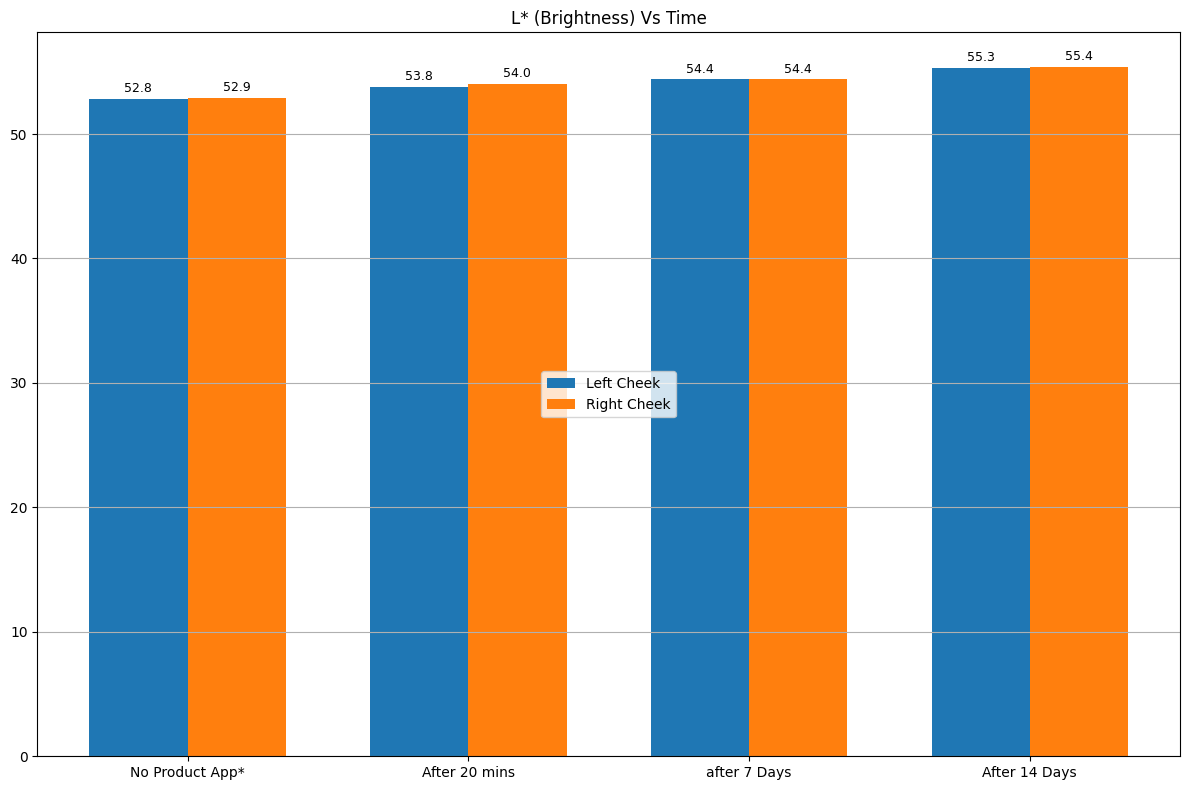

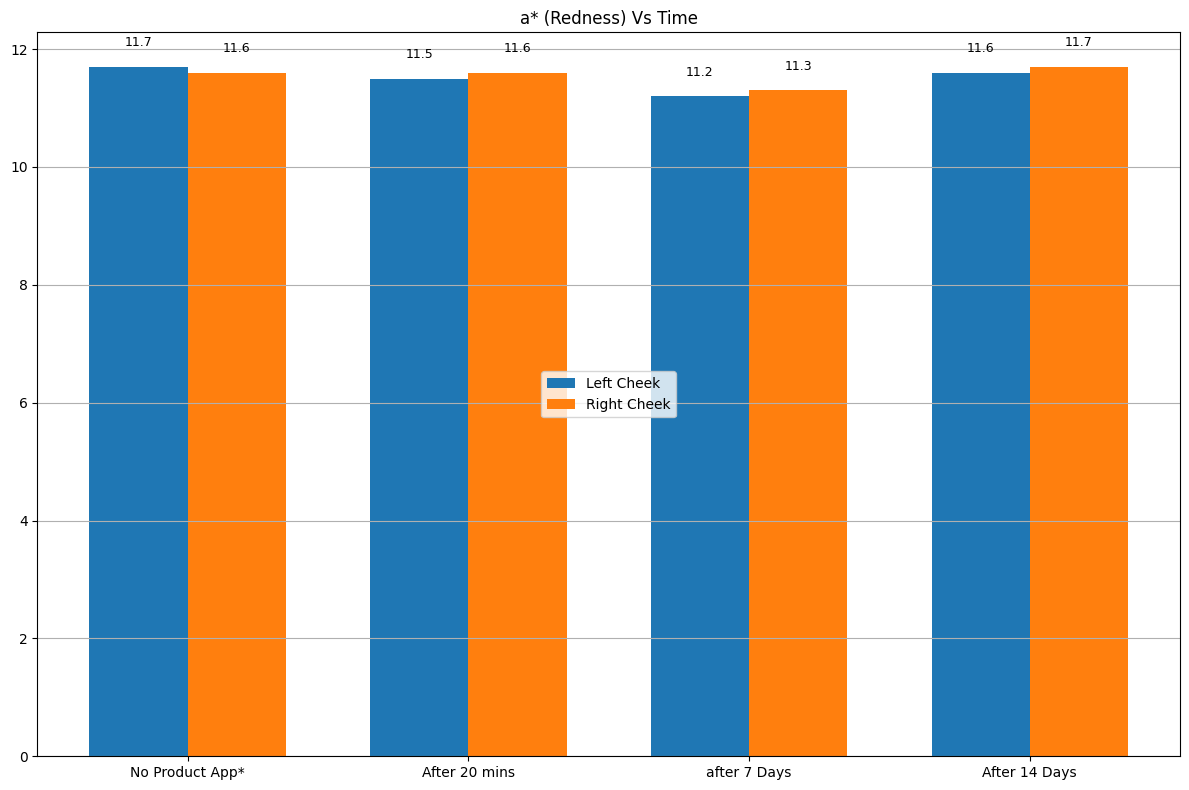

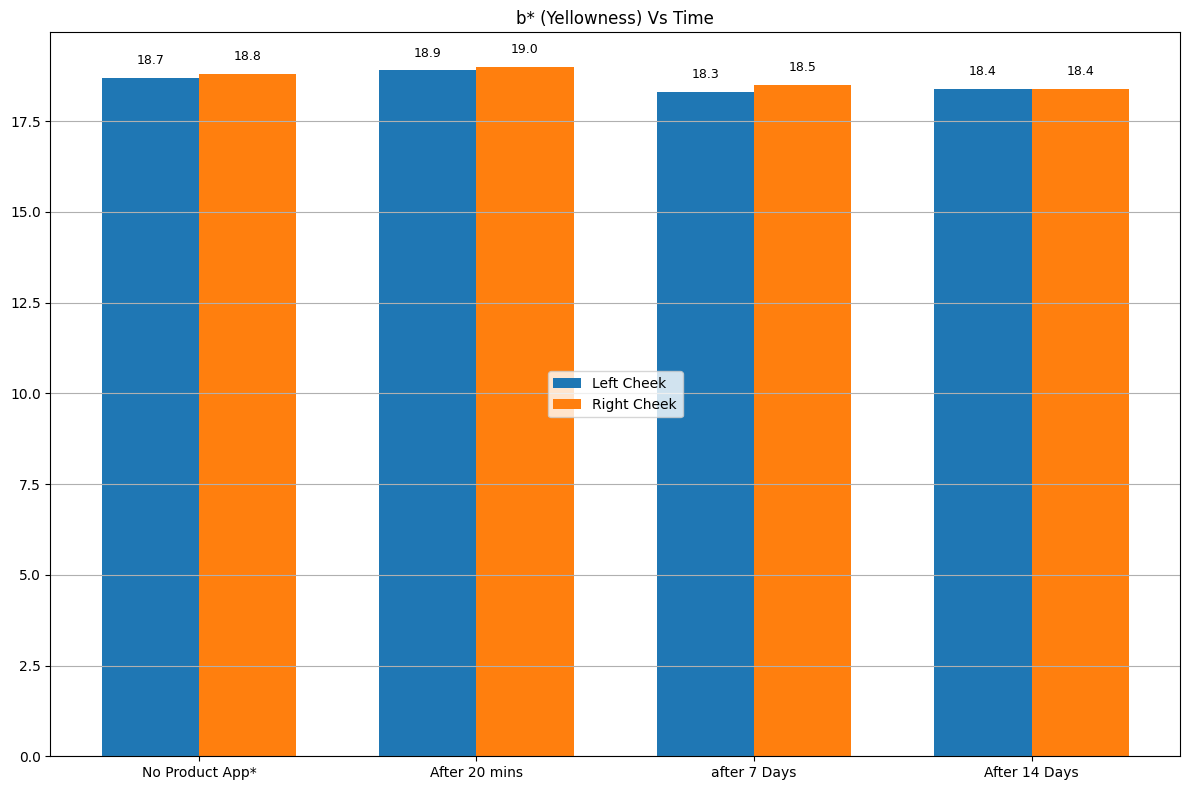

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


l_columns = ['Visit 1 - Baseline (L)', 'Visit 1 - Timm (L)', 'Visit 2 (L)', 'Visit 3 (L)']
a_columns = ['Visit 1 - Baseline (a)', 'Visit 1 - Timm (a)', 'Visit 2 (a)', 'Visit 3 (a)']
b_columns = ['Visit 1 - Baseline (b)', 'Visit 1 - Timm (b)', 'Visit 2 (b)', 'Visit 3 (b)']
visit_labels = ['No Product App*', 'After 20 mins', 'after 7 Days', 'After 14 Days']

def plot_metric(left_df, right_df, cols, title, ylabel):
    left_means = left_df[cols].mean().round(1).values
    right_means = right_df[cols].mean().round(1).values

    x = np.arange(len(cols))  
    width = 0.35

    fig, ax = plt.subplots(figsize=(12, 8))

    bars_left = ax.bar(x - width/2, left_means, width, label='Left Cheek')
    bars_right = ax.bar(x + width/2, right_means, width, label='Right Cheek')

    
    for bar in bars_left + bars_right:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 0.3, f'{height:.1f}', ha='center', va='bottom', fontsize=9)

    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(visit_labels)
    ax.legend(loc='center')
    ax.grid(axis='y')
    plt.tight_layout()
    plt.show()


plot_metric(left_cheek_df, right_cheek_df, l_columns, "L* (Brightness) Vs Time", "")
plot_metric(left_cheek_df, right_cheek_df, a_columns, "a* (Redness) Vs Time", "")
plot_metric(left_cheek_df, right_cheek_df, b_columns, "b* (Yellowness) Vs Time", "")


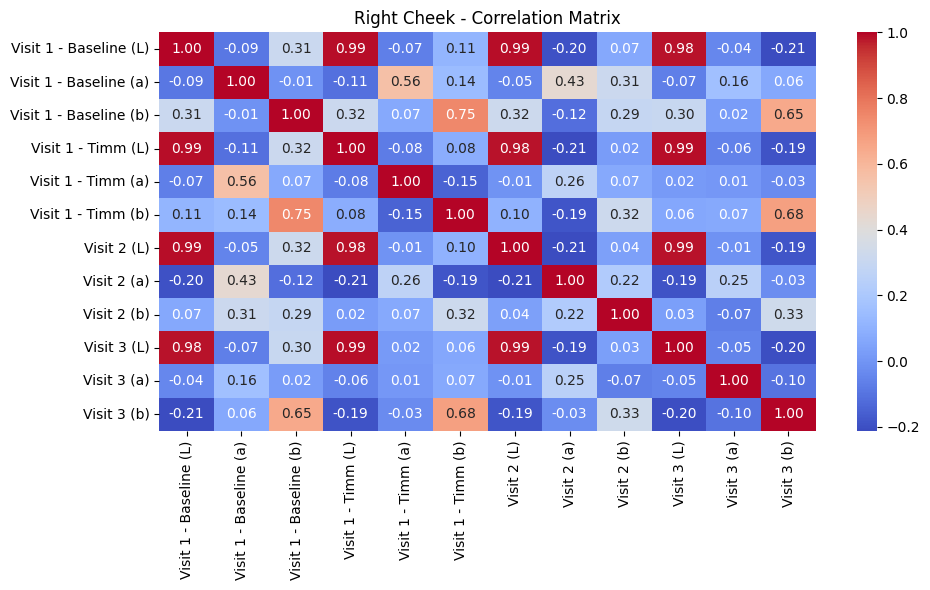

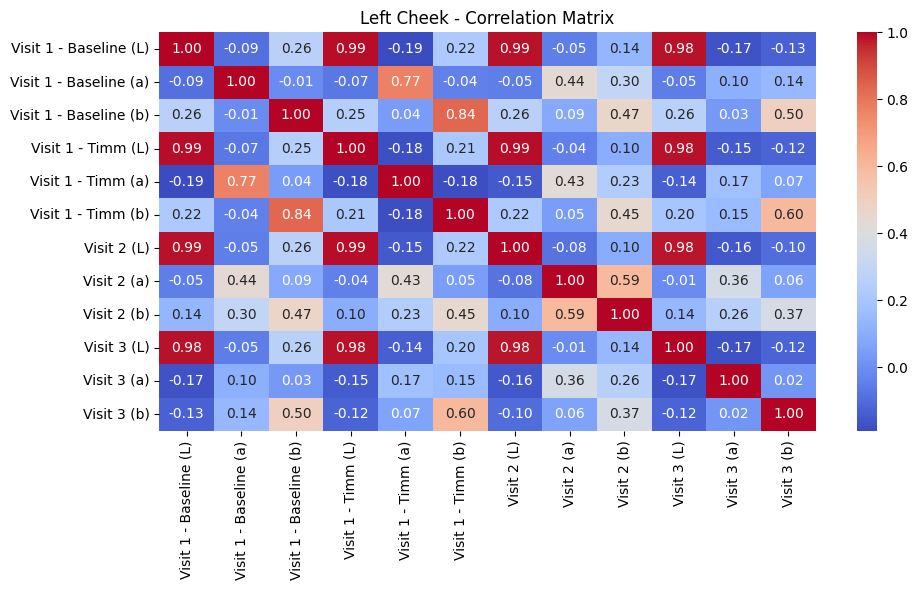

In [15]:
# Correlation heatmaps
plt.figure(figsize=(10, 6))
sns.heatmap(right_cheek_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Right Cheek - Correlation Matrix")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(left_cheek_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Left Cheek - Correlation Matrix")
plt.tight_layout()
plt.show()

In [16]:
corneo_df = pd.read_excel("Demo Data.xlsx", sheet_name="Instrument - Corneometer")

In [17]:

corneo_df = corneo_df.iloc[:, 1:]


corneo_df = corneo_df.reset_index(drop=True)
corneo_df.head()

,Visit 1 - Baseline,Visit 1 - Timm,Visit 2,Visit 3
0,41.833333,46.550000,54.066667,61.133333
1,47.550000,52.466667,58.350000,65.683333
2,32.083333,35.800000,43.583333,51.833333
3,38.816667,44.383333,51.116667,55.050000
4,35.850000,41.283333,46.050000,52.250000


In [18]:
corneo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Visit 1 - Baseline  38 non-null     float64
 1   Visit 1 - Timm      38 non-null     float64
 2   Visit 2             38 non-null     float64
 3   Visit 3             38 non-null     float64
dtypes: float64(4)
memory usage: 1.3 KB


In [19]:
corneo_df.describe()

,Visit 1 - Baseline,Visit 1 - Timm,Visit 2,Visit 3
count,38.000000,38.000000,38.000000,38.000000
mean,41.121316,45.900439,53.356360,61.750877
std,5.188431,5.078372,4.927613,5.384717
min,32.083333,35.716667,43.333333,51.833333
25%,37.115000,42.262500,50.079167,57.833333
50%,41.983333,45.966667,53.191667,61.983333
75%,45.475000,49.933333,57.441667,65.945833
max,49.416667,53.350000,62.050000,71.800000


In [20]:


#  Averaging values from both cheeks 
average_df = (right_cheek_df + left_cheek_df) / 2

In [21]:
average_df.head()

,Visit 1 - Baseline (L),Visit 1 - Baseline (a),Visit 1 - Baseline (b),Visit 1 - Timm (L),Visit 1 - Timm (a),Visit 1 - Timm (b),Visit 2 (L),Visit 2 (a),Visit 2 (b),Visit 3 (L),Visit 3 (a),Visit 3 (b)
0,49.465,10.830,18.955,51.140,11.600,19.610,51.200,10.090,18.020,51.705,11.965,19.915
1,46.510,12.130,17.595,48.650,12.395,18.695,48.545,12.285,19.290,51.070,11.335,19.575
2,52.355,13.250,18.000,52.985,12.870,18.050,53.545,12.200,18.445,55.305,12.325,18.980
3,48.420,12.175,18.185,48.755,12.205,18.915,49.265,11.520,19.250,51.080,9.360,17.520
4,51.280,12.785,19.235,51.460,11.670,19.340,52.050,10.700,18.880,52.315,8.880,17.785


In [22]:

combined_data = pd.concat([average_df.drop(columns=['Cluster', 'Hierarchical_Cluster'], errors='ignore'),
                           corneo_df.reset_index(drop=True)], axis=1)

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_combined_scaled = scaler.fit_transform(combined_data)

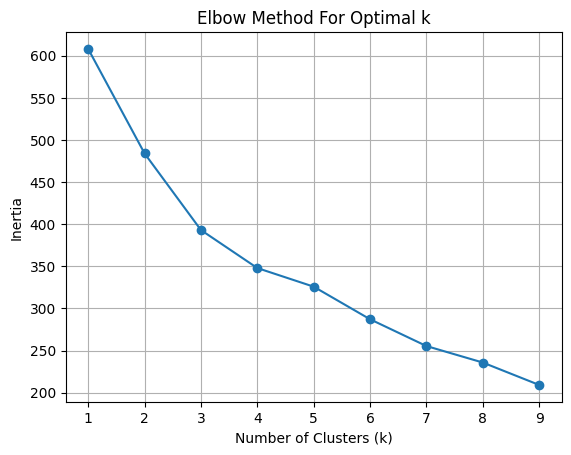

In [24]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K_range = range(1, 10)

for k in K_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_combined_scaled)
    inertia.append(model.inertia_)


plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

In [25]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
labels_combined = kmeans.fit_predict(X_combined_scaled)

# Add to the original DataFrame
combined_data['Combined_Cluster'] = labels_combined

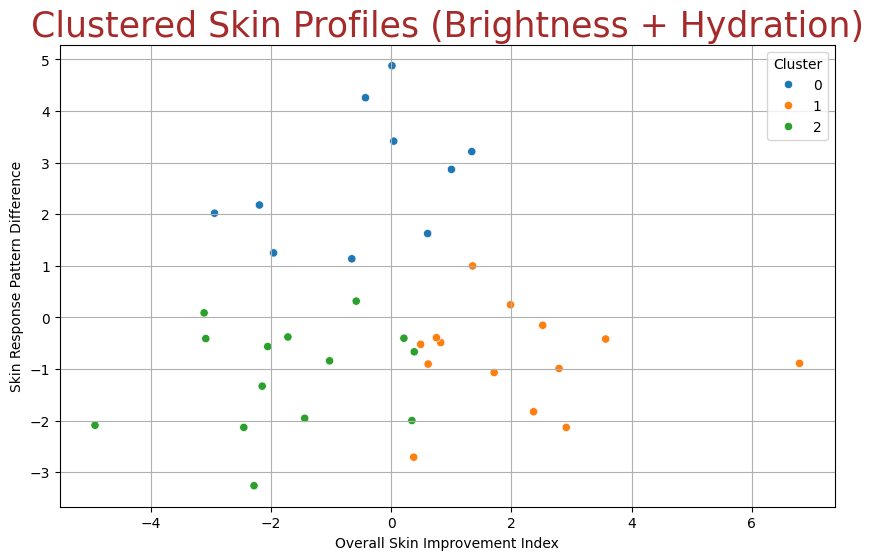

In [48]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_combined_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_combined, palette='tab10')
plt.title("Clustered Skin Profiles (Brightness + Hydration)", color = 'brown' , fontsize= '25')
plt.xlabel("Overall Skin Improvement Index")
plt.ylabel("Skin Response Pattern Difference")
plt.grid(True)
plt.legend(title="Cluster")
plt.show()

In [29]:
combined_data['Cluster'] = labels_combined  

cluster_summary = combined_data.groupby('Cluster').mean()
print(cluster_summary)

         Visit 1 - Baseline (L)  Visit 1 - Baseline (a)  \
Cluster                                                   
0                     58.533500               10.726500   
1                     47.485714               11.540357   
2                     54.236786               12.403929   

         Visit 1 - Baseline (b)  Visit 1 - Timm (L)  Visit 1 - Timm (a)  \
Cluster                                                                   
0                     18.350000           59.340000           10.870500   
1                     18.451429           48.772857           11.482143   
2                     19.418214           55.141071           12.062143   

         Visit 1 - Timm (b)  Visit 2 (L)  Visit 2 (a)  Visit 2 (b)  \
Cluster                                                              
0                 18.479000    59.707500    10.560000    17.751000   
1                 18.883571    49.031071    11.306429    18.644286   
2                 19.330357    55.888214    11.7

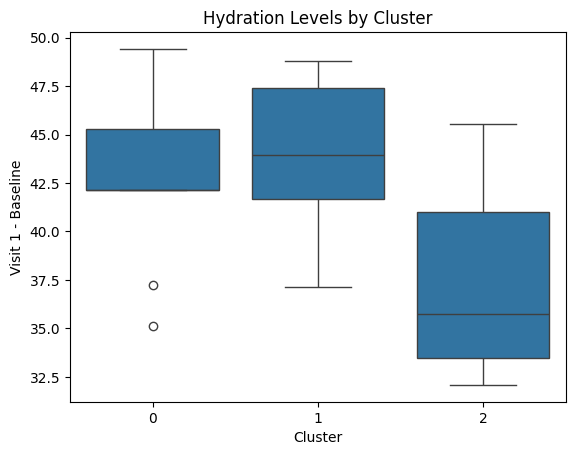

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Cluster', y='Visit 1 - Baseline', data=combined_data)
plt.title("Hydration Levels by Cluster")
plt.show()

<Axes: xlabel='Cluster', ylabel='Visit 3'>

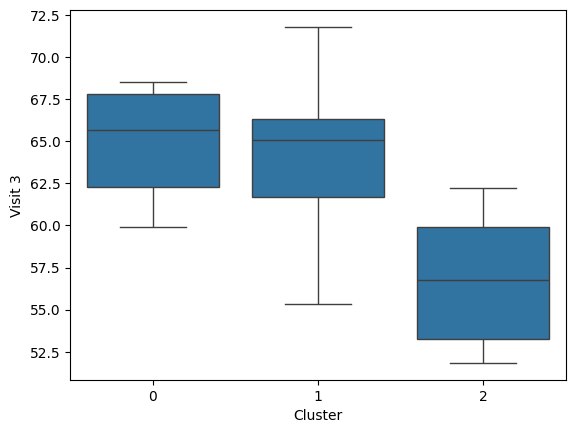

In [31]:
sns.boxplot(x='Cluster', y='Visit 3', data=combined_data)  # For post-treatment



<Axes: xlabel='Cluster', ylabel='Visit 3 (a)'>

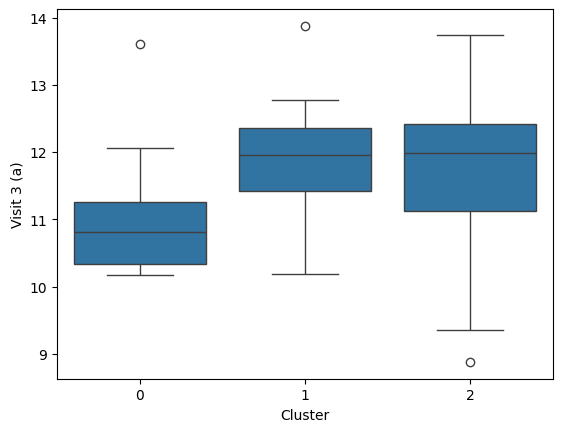

In [32]:
sns.boxplot(x='Cluster', y='Visit 3 (a)', data=combined_data)  # For redness

<Axes: xlabel='Cluster', ylabel='Visit 3 (L)'>

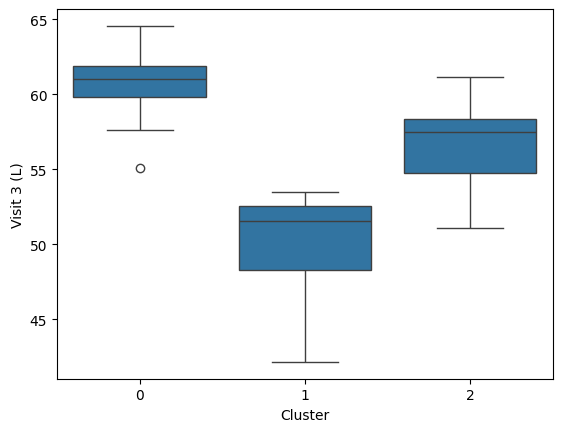

In [33]:
sns.boxplot(x='Cluster', y='Visit 3 (L)', data=combined_data)  # For brightness

In [34]:
# Brightness (L*)
combined_data['L*_Improvement'] = combined_data['Visit 3 (L)'] - combined_data['Visit 1 - Baseline (L)']

# Hydration
combined_data['Hydration_Improvement'] = combined_data['Visit 3'] - combined_data['Visit 1 - Baseline']

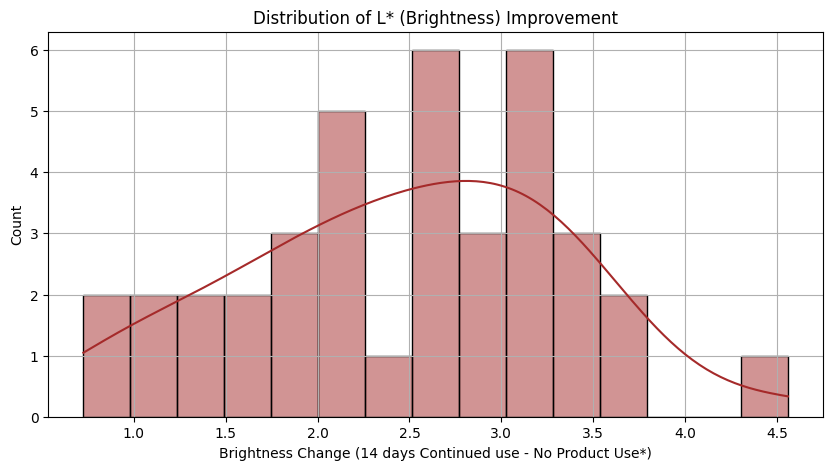

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.histplot(combined_data['L*_Improvement'], bins=15, kde=True, color='brown')
plt.title('Distribution of L* (Brightness) Improvement')
plt.xlabel('Brightness Change (14 days Continued use - No Product Use*)')
plt.grid(True)
plt.show()

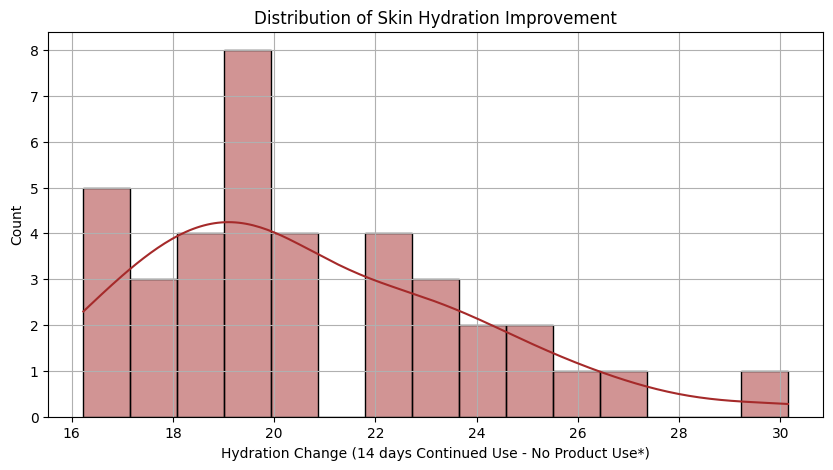

In [36]:
plt.figure(figsize=(10,5))
sns.histplot(combined_data['Hydration_Improvement'], bins=15, kde=True, color='brown')
plt.title('Distribution of Skin Hydration Improvement')
plt.xlabel('Hydration Change (14 days Continued Use - No Product Use*)')
plt.grid(True)
plt.show()

In [37]:
import scipy.stats as stats

corr, p = stats.pearsonr(combined_data['L*_Improvement'], combined_data['Hydration_Improvement'])
print(f"Correlation: {corr:.2f}, p-value: {p:.4f}")

Correlation: 0.07, p-value: 0.6881


In [38]:
corr, p = stats.spearmanr(combined_data['L*_Improvement'], combined_data['Hydration_Improvement'])

In [39]:
corr

np.float64(0.006018163912900755)

In [40]:
combined_data.columns

Index(['Visit 1 - Baseline (L)', 'Visit 1 - Baseline (a)',
       'Visit 1 - Baseline (b)', 'Visit 1 - Timm (L)', 'Visit 1 - Timm (a)',
       'Visit 1 - Timm (b)', 'Visit 2 (L)', 'Visit 2 (a)', 'Visit 2 (b)',
       'Visit 3 (L)', 'Visit 3 (a)', 'Visit 3 (b)', 'Visit 1 - Baseline',
       'Visit 1 - Timm', 'Visit 2', 'Visit 3', 'Combined_Cluster', 'Cluster',
       'L*_Improvement', 'Hydration_Improvement'],
      dtype='object')

In [41]:
# Creating final endpoint DataFrame
endpoint_df = pd.DataFrame()

# Adding relevant columns
endpoint_df['No Product Use(Brightness)'] = combined_data['Visit 1 - Baseline (L)']
endpoint_df['After 20 mins of Product Use(Brightness)'] = combined_data['Visit 1 - Timm (L)']
endpoint_df['After 7 Days of Product Use(Brightness)'] = combined_data['Visit 2 (L)']
endpoint_df['After 14 Days of Product Use(Brightness)'] = combined_data['Visit 3 (L)']


endpoint_df['L*(Brightness) Improvement 1st Time'] = endpoint_df['After 7 Days of Product Use(Brightness)'] - endpoint_df['After 20 mins of Product Use(Brightness)']
endpoint_df['L*(Brightness) Improvement 2nd Time'] = endpoint_df['After 14 Days of Product Use(Brightness)'] - endpoint_df['After 7 Days of Product Use(Brightness)']
endpoint_df['Final L*(Brightness) Improvement after 14 Days'] = endpoint_df['After 14 Days of Product Use(Brightness)'] - endpoint_df['No Product Use(Brightness)']

brightness_df = endpoint_df[['No Product Use(Brightness)', 'After 20 mins of Product Use(Brightness)', 'After 7 Days of Product Use(Brightness)', 
                             'After 14 Days of Product Use(Brightness)', 'L*(Brightness) Improvement 1st Time', 
                             'L*(Brightness) Improvement 2nd Time', 'Final L*(Brightness) Improvement after 14 Days']]
brightness_df = brightness_df.round(2)

In [42]:
endpoint_df['No Product Use(Hydaration)'] = combined_data['Visit 1 - Baseline']
endpoint_df['After 20 mins of Product Use(Hydaration)'] = combined_data['Visit 1 - Timm']
endpoint_df['After 7 Days of Product Use(Hydaration)'] = combined_data['Visit 2']
endpoint_df['After 14 Days of Product Use(Hydaration)'] = combined_data['Visit 3']


endpoint_df['Hydration Improvement 1st Time'] = endpoint_df['After 7 Days of Product Use(Hydaration)']  - endpoint_df['After 20 mins of Product Use(Hydaration)']
endpoint_df['Hydration Improvement 2nd Time'] = endpoint_df['After 14 Days of Product Use(Hydaration)'] - endpoint_df['After 7 Days of Product Use(Hydaration)'] 
endpoint_df['Final Hydration Improvement after 14 Days'] = endpoint_df['After 14 Days of Product Use(Hydaration)'] - endpoint_df['No Product Use(Hydaration)']

hydration_df = endpoint_df[['No Product Use(Hydaration)', 'After 20 mins of Product Use(Hydaration)' , 'After 7 Days of Product Use(Hydaration)', 
                             'After 14 Days of Product Use(Hydaration)', 'Hydration Improvement 1st Time' , 'Hydration Improvement 2nd Time' ,
                             'Final Hydration Improvement after 14 Days']]
hydration_df = hydration_df.round(2)


In [150]:
with pd.ExcelWriter("Skin_Endpoint_Result.xlsx", engine='openpyxl') as writer:
    brightness_df.to_excel(writer, sheet_name='Brightness', index=False)
    hydration_df.to_excel(writer, sheet_name='Hydration', index=False)